In [21]:
import numpy as np
import scipy.stats
import pickle
import time

startTime=time.time()
# Load the saved ARIMA model from the file
with open('mean_Latency_model.pkl', 'rb') as file:
    mean_loaded_model = pickle.load(file)
with open('std_Latency_model.pkl', 'rb') as file:
    std_loaded_model = pickle.load(file)



In [61]:
minute=5
fiveSecondFromMinute=minute*12
# Make predictions using the loaded model
prediction_time=int((time.time()-startTime)/5)
print(prediction_time)
mean_pred = mean_loaded_model.predict(prediction_time,prediction_time+fiveSecondFromMinute)
std_dev_pred = std_loaded_model.predict(prediction_time, prediction_time+fiveSecondFromMinute)

# Define threshold and time interval
threshold = 8


# Calculate cumulative probabilities for each time step within the interval
cumulative_probabilities = []
for mean, std_dev in zip(mean_pred[:], std_dev_pred[:]):
    probability = scipy.stats.norm.cdf(threshold, loc=mean, scale=std_dev)
    cumulative_probabilities.append(probability)

print(cumulative_probabilities)
cumulative_probabilities=np.array(cumulative_probabilities)
cumulative_probabilities = cumulative_probabilities[~np.isnan(cumulative_probabilities)]

# Combine probabilities (e.g., take the maximum)
combined_probability =1- np.prod(cumulative_probabilities)
combined_probability_max=np.max(1-cumulative_probabilities)
meanValuePredicted=np.mean(mean_pred)
print(f"Probability of exceeding 1 time '{threshold} second' of latency in {minute} minute: {combined_probability*100:.6f}%")
print(f"Max instant Probability of exceeding {threshold} second of latency in {minute} minute: {combined_probability_max*100:.6f}%")
print(f"Mean value predicted in {minute} minute: {meanValuePredicted:.2f} s")


111
[0.9849453029843844, 0.9849463543598702, 0.9842434185834392, 0.9837230395527315, 0.983271657631043, 0.9828550277747337, 0.9824621414595102, 0.9820972141209694, 0.9817592728274777, 0.9814477362121676, 0.9811620813354894, 0.9809017224546238, 0.9806660547423528, 0.980454457865356, 0.9802663002155184, 0.9952194042563843, 0.9990171415340934, 0.9999727489096328, 0.9999946176292238, 0.9988747179790793, 0.9972852748703684, 0.9944026677640904, 0.9903535865048927, 0.9852561910983454, 0.9792569744316886, 0.972520142041599, 0.965197991306808, 0.9574236451791698, 0.9493096102852564, 0.9409487335337013, 0.9324165079861039, 0.9237736698161996, 0.9150686764071132, 0.9063399049722531, 0.8976175250690104, 0.8889250568716928, 0.871477751407634, 0.8588201670812945, 0.8541179213984981, 0.8451490981529972, 0.8367888367040259, 0.8285258560486313, 0.835693204236927, 0.8348168616527986, 0.8347889134723598, 0.8348196537191628, 0.8348141331706378, 0.8348134221856378, 0.8348130529350215, 0.8348124538504936, 0

Text(0, 0.5, 'Latency (s)')

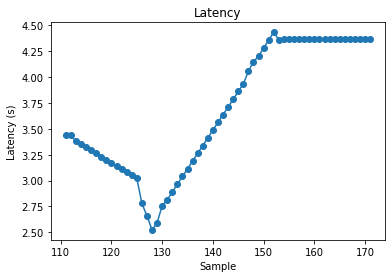

In [62]:
from matplotlib import pyplot as plt


plt.plot(mean_pred, marker='o')
plt.title('Latency')
plt.xlabel('Sample')
plt.ylabel('Latency (s)')